<a href="https://colab.research.google.com/github/jon-bown/data_ML_projects/blob/main/euclid_elements_book_1_prop_1_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align:center; color:#1565c0;">Euclid's Elements of Geometry</h1>


<h2 style="text-align:center; font-weight:normal;">Book 1: Fundamentals of Plane Geometry Involving Straight Lines</h2>
<h2 style="text-align:center; font-weight:normal;">Propositions 1-20</h2>

<div align='center'>
<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/8/8d/P._Oxy._I_29.jpg" alt="Trulli" width=500>
</figure>
</div>

<blockquote style="font-style:italic; margin:20px 0; padding:10px; border-left:5px solid #1565c0; background-color:#f2f2f2;">
    "If Euclid failed to kindle your youthful enthusiasm, then you were not born to be a scientific thinker."<br>
    - Albert Einstein (On The Method of Theoretical Physics)
</blockquote>

Much of my academic training was spent learning mathematics. It has long been a desire of mine to dig deeper into important mathematical works throughout history. At the top of the list has always been Euclid's Elements, otherwise known as 'The Elements'. Some fun facts about this important mathematical work:



* Often referred to as the most successful or influential textbook ever written
* It was one of the earliest mathematical works to be published after the invention of the printing press
* Second only to the Bible in number of editions published since 1482
* Influenced many scientists including: Copernicus, Kepler, Galileo, Einstein and Newton
* Once required in the ciriculum of all university students


This notebook will take you through the first 20 propositions in Book 1. Instead of doing the proofs by hand, they are done using python classes and visualizations. The overall question I asked when starting this was 'can all this be done using python code without loss of generality?'. 

The Elements is written as if you have a ruler and a compass handy to draw lines and circles. One of the postulates basically says 'lets assume you can draw a perfect circle'. 

This is obviously not available in python as an object by default, so there are some classes and functions that are used in place of what would be available on a piece of paper. For example, the intersections of two or more circles is assumed to be visually available. The aim is to preserve the logic laid out in the propositions in the python code and create classes that implement the propositions as functions. 

Euclid gave us logic and proof of the claims but he also gave us algorithms for working in two dimensional geometry in Book 1. As the propositions progress in this notebook, I rely less and less on the exact proof laid out in the text. The work done in the first few propositions make life easier when say, drawing an equilateral triangle. I don't need to go through the proof of proposition 1 every time I want to draw one. I rely on already established functions and classes to follow the logic of the current proof and continue to abstract away the less important details. 

The backbone of this notebook is a pre-existing python package conveniently titled 'Euclid'. The package and corresponding documentation can be found here: [Euclid](https://github.com/aholkner/euclid). Everything additional is either my own or specifically cited accordingly. 

A few sidenotes before starting:

- You'll notice the frequent use of rounding throughout this notebook, this is purely to ensure precision when building geometric objects in two dimensions in python. The set of all real numbers cannot be truly represented on a computer, thus there are rounding constraints that impose boundaries on the types of numbers that can represent 2D points, lines, etc. This is purely a computational constraint and not a geometric one. These constraints ensure the numerical representation of geometric objects is 100% accurate rather than 99.999999%. 
- The language of the propositions is a bit simplified compared to the pure latin translation. This is to make your life easier when reading it. The text used to put this notebook together was by Richard Fitzpatrick which includes a more modern english translation of the original writings.
- There are functions used for convenience that are for plotting, connecting, or measuring quantities. These are considered common notions rather than assuming more than what the propositions give you. Precisely extending a line for example is part of the notion that a striaght line can be drawn from any point to any point but it makes sense to keep these abstracted to avoid uncessary repetition in the code.

In [42]:
!pip install euclid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from euclid import *
import math
import random
import euclid
from decimal import Decimal, getcontext
getcontext().prec = 50

# Definitions

The following is used to intoduced some syntax with the Euclid package and testing that it works properly. I will not list out all the definitions, just the ones relevant to the propositions 1-20

1. A point is that of which there is no part.

2. And a line is a length without breadth.

3. And the extremities of a line are points.

4. A straight-line is one which lies evenly with points on itself.

9. And when the lines containing the angle are straight then the angle is called **rectilinear**.

11. An obtuse angle is one greater than a right-angle.

12. And an acute angle is one less than a right-angle.

13. A boundary is that which is the extremity of something.

15. A circle is a plane figure contained by a single line, all of the straight-lines radiating towards from one point amongst those lying inside the figure are equal to one another. 

# Postulates

These are five main abstractions that allow the proofs presented by Euclid to be possible.

1. Let it have been postulated to draw a straight-line from any point to any point.

In [44]:
Line2(Point2(0,0), Point2(0,1))

Line2(<0.00, 0.00> + u<0.00, 1.00>)

Notice here that a Line2 object in the Euclid package has a starting point + a unit times another point. This is similar to a vector, internally there are two points stored but the main representation is a point and a magnitude.

2. And to produce a finite straight-line continuously in a straight-line.

In [45]:
Line2(Point2(0,0), Point2(0,1))
LineSegment2(Point2(0,0), Point2(0,1))
LineSegment2(Line2(Point2(0,0), Point2(0,1)))

LineSegment2(<0.00, 0.00> to <0.00, 1.00>)

In [46]:
#One method provided by the euclid package is .connect which produces a straight line (the shortest)
Point2(0,0).connect(Point2(0,1))

LineSegment2(<0.00, 0.00> to <0.00, 1.00>)

3. And to draw a circle with any center and radius.

In [47]:
c = Circle(Point2(0,0), 2.0)
#CENTER
print(c.c)
#RADIUS
print(c.r)

Point2(0.00, 0.00)
2.0







4. And that all right-angles are equal to one another. 

In [48]:
A = Vector2(-1,1)
B = Vector2(1,1)
C = Vector2(0,1)
D = Vector2(1,0)
#AB = Line2(A, B)
np.degrees(A.angle(B)) == np.degrees(C.angle(D))

True

# Common Notions

1. Things equal to the same thing are also equal to one another

In [49]:
p = Point2(1.0, 2.0)
p1 = p
p2 = p
print(p1 == p2)

True


2. And if equal things are added to equal things then the wholes are equal

In [50]:
p1 = Point2(1.0, 1.0)
p2 = Point2(2.0, 2.0)
p3 = Point2(1.0, 1.0)
p4 = Point2(2.0, 2.0)

In [51]:
p1 + p2 == p3 + p4

True

3. And if equal things are subtracted from equal things then the remainders are equal.

In [52]:
p1 - p2 == p3 - p4

True

4. And things coinciding with one another are equal to one another

This essentially means that if two objects or figures can be exactly superimposed on each other, then they are equal in size, shape, and other properties. In the context of geometry, this principle is often used to show the congruence of geometric figures, such as triangles, rectangles, or other polygons. If you can place one figure on top of the other and they completely cover each other without any gaps or overlaps, then they are equal, or congruent, in all aspects.

5. And the whole is greater than the part

In the context of geometry and mathematics, this notion implies that when you have a complete figure or quantity, any proper subset or portion of that figure or quantity will always be smaller than the whole. For example, if you have a line segment, any smaller segment within the original line segment will always be shorter in length than the entire line segment.

# Euclid Library Extensions

The current version of the 'euclid' package is very minimal. I'm going to need some more convenient functions that implement the postulates so that I don't have to worry about details that are meant to be treated as a 'given' or have to unecessarily repeat myself. 

In [53]:
class Circle2E(euclid.Circle):

    def get_intersections(self, c2):
        """
        get intersections of self and another circle (which is at most two points, proven later by Euclid)
        """
      # self: (x0, y0), radius r0
      # circle 2: (x1, y1), radius r1
        if not isinstance(c2, Circle2E):
            raise AttributeError("Must pass euclid Circle object")
        
        x0 = self.c.x
        y0 = self.c.y
        r0 = self.r
    
        x1 = c2.c.x
        y1 = c2.c.y
        r1 = c2.r

        d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    
        # non intersecting
        if d > r0 + r1 :
            return None
        # One circle within other
        if d < abs(r0-r1):
            return None
        # coincident circles
        if d == 0 and r0 == r1:
            return None
        else:
            a=(r0**2-r1**2+d**2)/(2*d)
            h=math.sqrt(r0**2-a**2)
            x2=x0+a*(x1-x0)/d   
            y2=y0+a*(y1-y0)/d   
            x3=x2+h*(y1-y0)/d     
            y3=y2-h*(x1-x0)/d 

            x4=x2-h*(y1-y0)/d
            y4=y2+h*(x1-x0)/d
        
        return (x3, y3, x4, y4)

In [54]:
def point2_almost_equal(p1, p2, precision=2):
    if not isinstance(p1, Point2) or not isinstance(p2, Point2):
      raise TypeError("Incorrect object types passed as p1 or p2")
    return (round(p1.x, precision) == round(p2.x, precision)) and (round(p1.y, precision) == round(p2.y, precision))

In [112]:
class Line2E(euclid.Line2):
    """
    Extension of Line2 class that has more convenient functions for proving the propositions
    """
    def __len__(self):
        return round(self.p1.distance(self.p2), 2)
    def random_point(self, seed=42):
        """
        Returns random point along line rounded to two decimal places while ensuring it's still on the line.
        """
        random.seed(seed)
        t = random.random()  # Random value between 0 and 1
        # Use convexity of line to interpolate
        x = round(self.p1.x + t * (self.p2.x - self.p1.x), 2)
        y = round(self.p1.y + t * (self.p2.y - self.p1.y), 2)

        # Adjust t to account for rounding
        t_adjusted_x = (x - self.p1.x) / (self.p2.x - self.p1.x) if self.p2.x != self.p1.x else t
        t_adjusted_y = (y - self.p1.y) / (self.p2.y - self.p1.y) if self.p2.y != self.p1.y else t

        # Average the adjusted t values to minimize error
        t_adjusted = (t_adjusted_x + t_adjusted_y) / 2

        # Recalculate x and y with the adjusted t value
        x = round(self.p1.x + t_adjusted * (self.p2.x - self.p1.x), 2)
        y = round(self.p1.y + t_adjusted * (self.p2.y - self.p1.y), 2)

        return Point2(x, y)

    def __eq__(self, other):
        return self.__len__() == other.__len__()
    def angle(self, other: euclid.Geometry):
        return self.v.angle(other.v)
    def plot(self):
        return None

In [56]:
def get_common_point(L1: Line2E, L2: Line2E):
  """
  Given two lines L1, L2 determines if they have approximate point in common.
  """
  if point2_almost_equal(L1.p1, L2.p1):
    return L1.p1
  elif point2_almost_equal(L1.p1, L2.p2):
    return L1.p1
  elif point2_almost_equal(L1.p2, L2.p1):
    return L1.p2
  elif point2_almost_equal(L1.p2, L2.p2):
    return L1.p2
  elif L1.intersect(L2) is not None:
    return L1.intersect(L2)
  else:
    return None

In [57]:
def angle_btw_lines(L1: Line2E, L2: Line2E):
    """
    Calculate the angle between two lines internal to the two lines in the context of a triangle
    """
    if not isinstance(L1, Line2E) or not isinstance(L2, Line2E):
      raise TypeError("Either L1 or L2 lines are not of type Line2E")
    # Find the common point
    common_point = get_common_point(L1, L2)

    if common_point is None:
        return np.nan

    # Adjust the vectors to point inwards
    v1 = L1.v if L1.p1 == common_point else -L1.v
    v2 = L2.v if L2.p1 == common_point else -L2.v

    # Calculate the angle using the dot product formula
    cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle = np.arccos(np.clip(cos_angle, -1, 1))

    return round(np.degrees(angle), 2)

In [58]:
class Rectilinear():
    """
    Constructs a rectilinear with apex C jointing two lines at angle/2 from center
    """
    def __init__(self, S1: float, angle: float, S2: float):
        #construct point apex
        self.C = Point2(0,0)
        #construct first side with length S1
        xb = S1 * math.cos(math.radians(270.0-angle/2.0))
        yb = S1 * math.sin(math.radians(270.0-angle/2.0))
        self.B = Point2(xb, yb)
        #construct next side with length S2 making angle A with side 1
        xa = S2 * math.cos(math.radians(270.0+angle/2.0))
        ya = S2 * math.sin(math.radians(270.0+angle/2.0))
        self.A = Point2(xa, ya)
        self.a = Line2E(self.C, self.A)
        #take two final points and connect with line
        self.b = Line2E(self.C, self.B)
        self.angle = angle_btw_lines(self.a, self.b)

    def plot(self):
        return None

In [59]:
# Validity of Triangle given sides
# SRC: https://www.codesansar.com/python-programming-examples/check-validity-triangle-given-sides.htm
def is_valid_triangle(a,b,c):
    """
    Checks if three given side lengths will form a triangle
    """
    if a+b>=c and b+c>=a and c+a>=b:
        return True
    else:
        return False

In [60]:
def get_offset(centroid, point, scale=0.2):
    """
    Gets offset of annotation from centroid and points of triangles
    """
    dx = point[0] - centroid[0] - scale
    dy = point[1] - centroid[1]
    return (point[0] + dx * 0.2, point[1] + dy * scale)

In [61]:
def extend_point2_circle_edge(cir: Circle, point: Point2, angle: float):
  """
  Extends point to circle edge
  """
  angle_rad = angle

  # Calculate the X and Y offsets
  offset_x = cir.r * np.cos(angle_rad)
  offset_y = cir.r * np.sin(angle_rad)

  # Calculate the coordinates of the point on the circle's edge
  point_x = cir.c.x + offset_x
  point_y = cir.c.y + offset_y
  return Point2(point_x, point_y)

To implement a Triangle object, each component will be set up to follow this pattern.

<div align='center'>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Triangle_with_notations_2.svg/2560px-Triangle_with_notations_2.svg.png" width=500/>
    </div>

In [62]:
"""
A triangle is a shape composed of three points, lines connecting those points, and three angles between each line.
"""
class Triangle():
    def __init__(self, a: Line2E, b: Line2E, c: Line2E):
        self.a = a
        self.b = b
        self.c = c
        self.equilateral = (round(a.__len__(),2) == round(b.__len__(), 2)) and (round(b.__len__(), 2) == round(c.__len__(), 2))
        self.A = get_common_point(c, b)
        self.B = get_common_point(c, a)
        self.C = get_common_point(a, b)

        #each angle
        self.beta = angle_btw_lines(a, c)
        self.alpha = angle_btw_lines(c, b)
        self.gamma = angle_btw_lines(a, b)
        
        self.min_x = min(c.p2.x, c.p1.x, a.p1.x)
        self.max_x = max(c.p2.x, c.p1.x, a.p1.x)
        self.min_y = min(c.p2.y, c.p1.y, a.p1.y)
        self.max_y = max(c.p2.y, c.p1.y, a.p1.y)
    @classmethod
    def SAS(cls, S1: float, angle: float, S2: float):
        """
        Constructs a triangle from two side lengths and an angle between the two sides. 
        """
        #construct point apex
        C = Point2(0,0)
        #construct first side with length S1
        xb = S1 * float(Decimal(math.cos(math.radians(270.0-angle/2.0))))
        yb = S1 * float(Decimal(math.sin(math.radians(270.0-angle/2.0))))
        B = Point2(xb, yb)
        a = Line2E(C, B)
        #construct next side with length S2 making angle A with side 1
        x2 = S2 * float(Decimal(math.cos(math.radians(270.0+angle/2.0))))
        y2 = S2 * float(Decimal(math.sin(math.radians(270.0+angle/2.0))))
        A = Point2(x2, y2)
        b = Line2E(C, A)
        #take two final points and connect with line, pass to constructor
        c = Line2E(B, A)
        return cls(a, b, c)
    @classmethod
    def AAA(cls, gamma: float, beta: float, alpha: float, a_length=1.0):
        """
        Constructs triangle with three given angle sizes in degrees
        """
        if gamma + beta + alpha != 180.0:
          print("Angles do not allow triangle construction")
          return None
        # Place point C at the origin
        C = Point2(0, 0)

        # Create point B along the x-axis
        B = Point2(a_length, 0)

        # Calculate the length of side b using the Law of Sines
        b_length = a_length * math.sin(math.radians(beta)) / math.sin(math.radians(gamma))

        # Calculate the coordinates of point A
        xa = b_length * math.cos(math.radians(alpha))
        ya = b_length * math.sin(math.radians(alpha))
        A = Point2(xa, ya)

        # Create line segments
        a = Line2E(C, B)
        b = Line2E(C, A)
        c = Line2E(B, A)
        return cls(a, b, c)
    @classmethod
    def SSS(cls, S1: float, S2: float, S3: float):
        """
        Constructs a triangle with given lengths (side, side, side)
        S1 - a
        S2 - b
        S3 - c
        """
        
        if not is_valid_triangle(S1, S2, S3):
            print("Invalid Triangle Specification")
            return None
        C = Point2(0,0)
        B = Point2(0, 0 - S1)
        a = Line2E(C, B)
        #determine angle to move to point A
        beta = np.degrees(np.arccos((S1**2+S2**2-S3**2)/(2*S1*S2)))
        x2 = round(S2 * math.cos(math.radians(90.0+beta)), 2)
        y2 = round(S2 * math.sin(math.radians(90.0+beta)), 2)
        A = Point2(x2, y2)
        c = Line2E(B, A)
        b = Line2E(A, C)
        return cls(a, b, c)
    @classmethod
    def ASA(cls, a1: float, S: float, a2: float):
        """
        Constructs triangle with two base angles and base side length
        """
        B = Point2(0.0, 0.0)
        A = Point2(B.x+S, 0.0)
        AB = Line2E(A, B)
        xc = A.x + round(S*math.cos(math.radians(180-a2)),2)
        yc = round(S*math.sin(math.radians(a2)),2)
        tempC = Line2E(Point2(xc, yc), A)
        xb = round(S*math.cos(math.radians(a1)), 2)
        yb = round(S*math.sin(math.radians(a1)), 2)
        tempB = Line2E(B, Point2(xb, yb))
        C = tempB.intersect(tempC)
        C = Point2(round(C.x, 2), round(C.y, 2))
        CA = Line2E(C, A)
        CB = Line2E(C, B)
        return cls(CA, CB, AB)
    def __eq__(self, other):
        return self.a == other.a and self.b == other.b and self.c == other.c and self.alpha == other.alpha and self.beta == other.beta and self.gamma == other.gamma
    def plot(self, title='', full=True, ax=None, annotate=True, colors=None):
        centroid = ((self.A[0] + self.B[0] + self.C[0]) / 3, (self.A[1] + self.B[1] + self.C[1]) / 3)
        if ax is None:
          fig, ax = plt.subplots()
        if colors is None:
          plt.plot([self.a.p1.x, self.a.p2.x], [self.a.p1.y, self.a.p2.y], marker='o', label='a')
          plt.plot([self.b.p1.x, self.b.p2.x], [self.b.p1.y, self.b.p2.y], marker='o', label='b')
          plt.plot([self.c.p1.x, self.c.p2.x], [self.c.p1.y, self.c.p2.y], marker='o', label='c')
        elif len(colors) == 3:
          plt.plot([self.a.p1.x, self.a.p2.x], [self.a.p1.y, self.a.p2.y], marker='o', label='a', color=colors[0])
          plt.plot([self.b.p1.x, self.b.p2.x], [self.b.p1.y, self.b.p2.y], marker='o', label='b', color=colors[1])
          plt.plot([self.c.p1.x, self.c.p2.x], [self.c.p1.y, self.c.p2.y], marker='o', label='c', color=colors[2])
        if ax != None and annotate:
          ax.annotate('C', self.C, get_offset(centroid, self.C), fontsize=12)
          ax.annotate('A', self.A, get_offset(centroid, self.A), fontsize=12)
          ax.annotate('B', self.B, get_offset(centroid, self.B), fontsize=12)

        if full:
          plt.title(title)
          plt.legend()
          plt.tight_layout()
          plt.show()
    def check_angles(self):
        return self.beta + self.alpha + self.gamma
        

In [63]:
def plot_2d(objs, names, annotate=True, edge=0.1, size=5, title='', legend_loc='upper right'):
    """
    Plot 2D Euclid Elements
    
    Plots according to figsize of 'size' and edges away from max/min +/- 'edge'
    
    objs = List of objects to plot
    names = List of names of objects to show on legend
    colors = List of colors applied to each object
    
    """
    #Simply color cyle used because we won't have many objects on a plot at once
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    color_index = 0
    #figsize=(size, size)
    fig, ax = plt.subplots()
    min_x, max_x, min_y, max_y = None, None, None, None
    for i, obj in enumerate(objs):
        if isinstance(obj, Circle2E):
            circle1=plt.Circle((obj.c.x, obj.c.y), obj.r, fill=False, label=names[i], color=color_cycle[color_index])
            plt.gca().add_artist(circle1)
            
            #adjust boundaries
            min_x = min(min_x, obj.c.x - obj.r) if min_x is not None else obj.c.x - obj.r
            max_x = max(max_x, obj.c.x + obj.r) if max_x is not None else obj.c.x + obj.r
            min_y = min(min_y, obj.c.y - obj.r) if min_y is not None else obj.c.y - obj.r
            max_y = max(max_y, obj.c.y + obj.r) if max_y is not None else obj.c.y + obj.r
        elif isinstance(obj, Line2):
            plt.plot([obj.p1.x, obj.p2.x], [obj.p1.y, obj.p2.y], marker='o', label=names[i], color=color_cycle[color_index])
            if len(names[i]) > 1 and annotate:
              ax.annotate(names[i][0], (obj.p1.x-0.15, obj.p1.y-0.03), fontsize=14)
              ax.annotate(names[i][1], (obj.p2.x+0.03, obj.p2.y-0.03), fontsize=14)
            
            #adjust boundaries
            min_x = min(min_x, obj.p1.x, obj.p2.x) if min_x is not None else min(obj.p1.x, obj.p2.x)
            max_x = max(max_x, obj.p1.x, obj.p2.x) if max_x is not None else max(obj.p1.x, obj.p2.x)
            min_y = min(min_y, obj.p1.y, obj.p2.y) if min_y is not None else min(obj.p1.y, obj.p2.y)
            max_y = max(max_y, obj.p1.y, obj.p2.y) if max_y is not None else max(obj.p1.y, obj.p2.y)
        elif isinstance(obj, Triangle):
            colors = []
            for i in range(3):
              colors.append(color_cycle[color_index])
              color_index = (color_index + 1) % len(color_cycle)
            obj.plot(full=False, ax=ax, annotate=annotate, colors=colors)


            min_x = min(min_x, obj.min_x) if min_x is not None else obj.min_x
            max_x = max(max_x, obj.max_x) if max_x is not None else obj.max_x
            min_y = min(min_y, obj.min_y) if min_y is not None else obj.min_y
            max_y = max(max_y, obj.max_y) if max_y is not None else obj.max_y
        elif isinstance(obj, Point2):
          plt.scatter(obj.x, obj.y, label=names[i], color=color_cycle[color_index])
        color_index = (color_index + 1) % len(color_cycle)
    plt.title(title)
    plt.axis([min_x - edge*(max_x-min_x), max_x + edge*(max_x-min_x), min_y - edge*(max_y-min_y), max_y + edge*(max_y-min_y)])
    plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()
        

# Proposition 1: Construct an Equilateral Triangle

In [64]:
#Let AB be the given finite straight line
A = Point2(0,1)
B = Point2(1,1)
AB = Line2E(A, B)
# Let the circle BCD with center A and radius AB have been drawn
radius = A.distance(B)
BCD = Circle2E(A, radius)
# let the circle ACE with center B and radius BA have been drawn
ACE = Circle2E(B, radius)
points = BCD.get_intersections(ACE)
C = Point2(points[2],points[3])
# And let the straight-lines CA and CB have been joined from the point C, 
# where the circles cut one another to the points A and B.
CA = Line2E(C, A)
CB = Line2E(C, B)

ABC = Triangle(CB, CA, AB)
prop1_cond = ABC.equilateral
if prop1_cond:
  print("ABC is an equilateral triangle, the very thing it was required to do.")

ABC is an equilateral triangle, the very thing it was required to do.


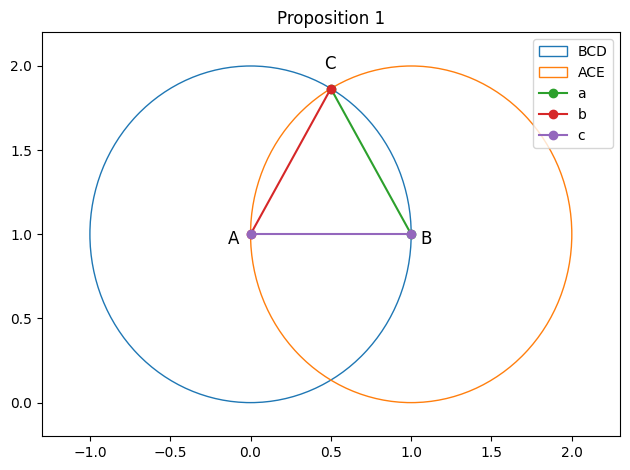

In [65]:
plot_2d([BCD, ACE, ABC], ['BCD','ACE','ABC'], title='Proposition 1')

In [66]:
#ABSTRACTION OF PROP 1
def draw_equilateral(AB: Line2E, direction=1):
    """
    Given a line, construct an equliateral triangle with a new point C
    """
    A = AB.p1
    B = AB.p2
    radius = A.distance(B)
    BCD = Circle2E(A, radius)
    ACE = Circle2E(B, radius)
    points = BCD.get_intersections(ACE)
    if direction == 1:
        C = Point2(points[2],points[3])
    else:
        C = Point2(points[0],points[1])
        
    b = Line2E(A, C)
    a = Line2E(C, B)
    c = Line2E(B, A)
    ABC = Triangle(a, b, c)
    return ABC

# Proposition 2: To place a straight-line equal to a given straight-line at a given point (as an extremety)

In [67]:
# Let A be the given point, 
A = Point2(-1,-1)

#Let BC the given straight-line. 
B = Point2(1, -1)
C = Point2(1, 4)
BC = Line2(B, C)

# Let AB have been joined from A to B
AB = Line2(A, B)

#Let eq. triangle DAB have been constructed upon it
DAB = draw_equilateral(AB)
print("DAB Equilateral Check: ", DAB.equilateral)
D = DAB.C

# Let straight-lines AE and BF have been produced in a straight-line with DA/DB
E = A - 6*DAB.b.v.__truediv__(DAB.b.v.__abs__())
F = B + 6*DAB.a.v.__truediv__(DAB.a.v.__abs__())
AE = Line2(A, E)
BF = Line2(B, F)

#And let the circle CGH with center D and radius BC have been drawn
CGH = Circle2E(B, B.distance(C))

#Let the circle GKL with center D and radius DG have been drawn
G = euclid._connect_point2_circle(F, CGH).p2
GKL = Circle2E(D, D.distance(G))
L = euclid._connect_point2_circle(E, GKL).p2
AL = Line2(A, L)


print("AL and BC are equal to BG")
print("AL == BG", A.distance(L) == B.distance(G))
print("BC == BG", B.distance(C) == B.distance(G))
print("Things equal to the same thing are equal to each other")
prop2_cond = A.distance(L) == B.distance(C)
if prop2_cond:
  print("AL == BC, The very thing it was required to do")

DAB Equilateral Check:  True
AL and BC are equal to BG
AL == BG True
BC == BG True
Things equal to the same thing are equal to each other
AL == BC, The very thing it was required to do


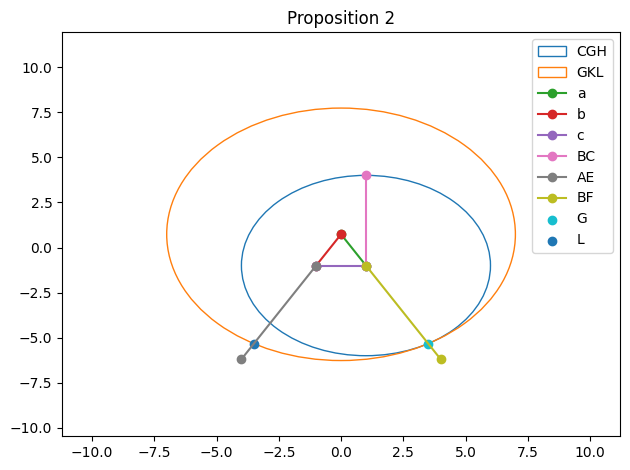

In [68]:
plot_2d([CGH, GKL, DAB, BC, AE, BF, G, L], ['CGH','GKL','DAB', 'BC', 'AE', 'BF', 'G', 'L'], title='Proposition 2', annotate=False, edge=0.3)

# Proposition 3: For two given unqual straight-lines, to cut off from the greater a straight-line equal to the lesser.


The objective here is to take two lines of unequal length, and make a third line equal to the smaller line.

In [69]:
#Let AB and C be the two given unequal straight-lines, of which let the greater be AB.
A = Point2(0,0)
B = Point2(1.5,0)
AB = Line2E(A, B)
C = Line2E(Point2(-0.5, 2), Point2(0.5, 2))
# Draw a circle of radius length of AD and call it DEF
DEF = Circle2E(A, C.__len__())
D = extend_point2_circle_edge(DEF, A, 3*np.pi/4)
AD = Line2E(A, D)
#Cut off the line AE at the circle's intersection with AB
AE = Line2E(A, euclid._intersect_line2_circle(AB, DEF).p1)
# Since point A is the center of circle DEF, AE == AD
# But AD is equal to C
prop3_cond = AE.__len__() == C.__len__()
if prop3_cond:
    print("AE == C, The very thing it was required to do")

AE == C, The very thing it was required to do


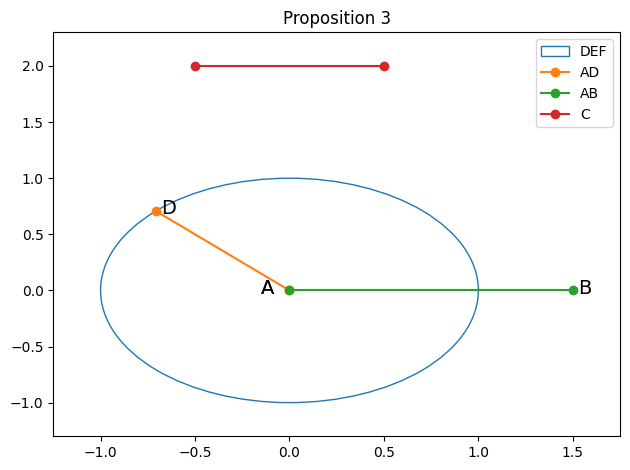

In [70]:
plot_2d([DEF, AD, AB, C], ['DEF','AD','AB', 'C'], title='Proposition 3')

In [71]:
def prop_3(L1: Line2E, L2: Line2E):
    """
    Given two unequal lines, returns a line equal to the lesser of the two
    """
    if L1.__len__() == L2.__len__():
        print("Lines already equal")
        return None
    if L1.__len__() < L2.__len__():
      # Draw a circle of radius length of AD and call it DEF
      DEF = Circle2E(L2.p1, L1.__len__())
      #Cut off the line AE at the circle's intersection with AB
      AE = Line2E(L2.p1, euclid._intersect_line2_circle(L2, DEF).p1)
      E = euclid._intersect_line2_circle(L2, DEF).p1
      AE = Line2E(Point2(round(L2.p1.x, 2), round(L2.p1.y, 2)),  Point2(round(E.x, 2), round(E.y, 2)))
    if L2.__len__() < L1.__len__():
      # Draw a circle of radius length of AD and call it DEF
      DEF = Circle2E(L1.p1, L2.__len__())
      E = euclid._intersect_line2_circle(L1, DEF).p1
      #Cut off the line AE at the circle's intersection with AB
      AE = Line2E(Point2(round(L1.p1.x, 2), round(L1.p1.y, 2)),  Point2(round(E.x, 2), round(E.y, 2)))
    return AE

# Proposition 4: 

If two triangles have two sides equal to two sides, respecitvely, and have angles enclosed by the equal straight-lines equal, then they will also have the base equal to the base, and the triangle will be equal to the triangle.

In [72]:
#Let ABC and DEF be two triangles having the two sides AB and AC equal to DE and DF
ABC = Triangle.SAS(1, 30.0, 2)
#Let the angle BAC be equal to the angle EDF (30 degrees)
DEF = Triangle.SAS(1, 30.0, 2)

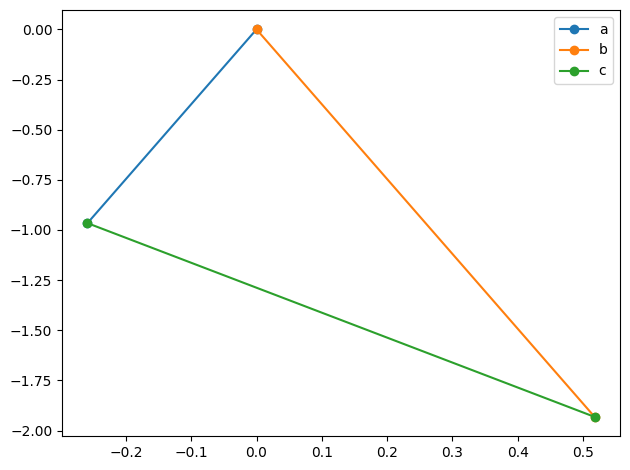

In [73]:
ABC.plot(annotate=False)

In [74]:
#The whole triangle coincides with the whole triangle
prop4_cond = ABC.c.__len__() == DEF.c.__len__()
if prop4_cond:
    print("ABC == DEF", ABC == DEF)
    print("ABC.c == DEF.c, The very thing it was required to do")

ABC == DEF True
ABC.c == DEF.c, The very thing it was required to do


# Proposition 5

For isosceles triangles, the angles at the base are equal to one another, and if the equal sides are produced then the angles under the base will be equal to one another.

In [75]:
def extend_line(A, B, extension_length):
    # Calculate the line segment vector (B - A)
    line_vector = np.array([B.x - A.x, B.y - A.y])
    
    # Calculate the unit vector of the line segment direction
    unit_vector = line_vector / np.linalg.norm(line_vector)
    
    # Multiply the unit vector by the extension length
    extension_vector = unit_vector * extension_length
    
    # Add the extension vector to the endpoint of the line segment (B)
    D_x = B.x + extension_vector[0]
    D_y = B.y + extension_vector[1]
    
    return Point2(D_x, D_y)

In [76]:
#In this notebook, Triangles are names BCA because the point C is at the top when the object is built. The language has been adjusted accordingly
#Let BCA be an isosceles triangle having CB equal to CA
ABC = Triangle.SAS(1, 30.0, 1)
#Let straight-lines BD and AE have been produced in a straight-line with CB, CA
D = extend_line(ABC.C, ABC.B, 0.5)
E = extend_line(ABC.C, ABC.A, 0.5)
BD = Line2E(ABC.B, D)
AE = Line2E(ABC.A, E)
#Reference for line CE
CE = Line2E(ABC.C, E)
#Let point F be taken at random on BD
F = BD.random_point(seed=50)
#Let lines AF, CF connect points A, C to F
AF = Line2E(ABC.A, F)
CF = Line2E(ABC.C, F)
#Let CG have been cut off from the greater CE equal to CF
CG = prop_3(CF, CE)
BG = Line2E(ABC.B, CG.p2)
prop5_cond = ABC.alpha == ABC.beta and angle_btw_lines(ABC.c, AF) == angle_btw_lines(ABC.c, BG)
if prop5_cond:
    print("ABC.alpha == ABC.beta and angle_btw_lines(ABC.c, AF) == angle_btw_lines(ABC.c, BG), The very thing it was required to do")

ABC.alpha == ABC.beta and angle_btw_lines(ABC.c, AF) == angle_btw_lines(ABC.c, BG), The very thing it was required to do


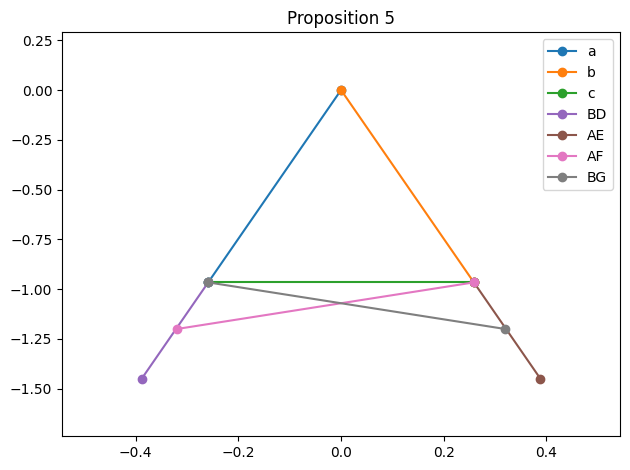

In [77]:
plot_2d([ABC, BD, AE, AF, BG], ['ABC','BD', 'AE', 'AF', 'BG'], title='Proposition 5', annotate=False, edge=0.2)

# Proposition 6: If a triangle has two equal angles equal to one another then the sides subtending the equal angles will also be equal to one another.

Before moving forward, it is important to define the term 'subtending'. 

> Specifically, an angle is said to subtend an arc or side when its two rays (or sides) extend from its vertex to the endpoints of the arc or side.

The proof of this proposition is proof by contradiction, not construction. It doesn't really add much to the rest of the work in this notebook. I'm treating this more of a unit test for Triangle construction than a logical, step by step proof. 

In [78]:
#Construct Triangle using 'Angle Side Angle' initializaiton
test = Triangle.ASA(30.0, 1, 30.0)
prop6_cond = test.a.__len__() == test.b.__len__()
if prop6_cond:
  print("The sides subtending the equal angles are equal, the very thing it was required to show")

The sides subtending the equal angles are equal, the very thing it was required to show


In [79]:
test = Triangle.ASA(60.0, 1, 60.0)

In [80]:
test.a.__len__() == test.b.__len__()

True

# Proposition 7: On the same straight-line, two other straight-lines equal, respectively, to two straight-lines cannot be constructed at a different point on the same side, but having the same ends as the given straight-lines

In [81]:
#Let two triangles be constructed with the same base
ACB = Triangle.ASA(60.0, 2.0, 60.0)
ADB = Triangle.ASA(45.0, 2.0, 75.0)
#Let DC have been joined
DC = Line2E(ADB.C, ACB.C)
prop7_cond = angle_btw_lines(DC, ACB.a) != angle_btw_lines(DC, ADB.a)
if prop7_cond:
  print("Equal angles produce equal sides, the angles are not equal therefore they have different points. The very thing it was required to show")

Equal angles produce equal sides, the angles are not equal therefore they have different points. The very thing it was required to show


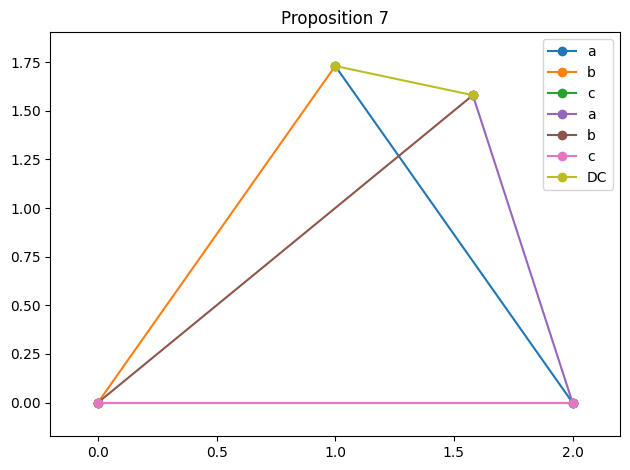

In [82]:
plot_2d([ACB, ADB, DC], ['ACB','ADB', 'DC'], title='Proposition 7', annotate=False)

# Proposition 8: If two triangles have two sides equal to two sides, respectively, and also have the base equal to the base then they will also have equal the angles encompassed by the equal straight-lines.

In [83]:
# Construct two triangles with three given, equal side lengths
T1 = Triangle.SSS(3,4,5)
T2 = Triangle.SSS(3,4,5)

In [84]:
prop8_cond = T1.gamma == T2.gamma and T1.alpha == T2.alpha and T1.beta == T2.beta
if prop8_cond:
  print("Angles of both triangles are equal when base and two sides equal, the very thing it was required to do.")

Angles of both triangles are equal when base and two sides equal, the very thing it was required to do.


# Proposition 9: To cut a given rectilinear angle in half

In [85]:
#Let BAC be the given rectilinear angle. 
BAC = Rectilinear(2.0, 30.0, 2.0)
#Let the point D have been taken at random on AB
D = BAC.b.random_point(seed=10)
#Let AE, equal to AD, have been cut off from AC
AD = Line2E(BAC.C, D)
AE = prop_3(AD, BAC.a)
E = AE.p2
#Let DE have been joined
DE = Line2E(D, E)
#Let the equilateral Triangle DEF have been constructed upon DE
DEF = draw_equilateral(DE, direction=-1)
#Let AF have been joined
AF = Line2E(BAC.C, DEF.C)
print("AE == AD", AE.__len__() == AD.__len__())
#Since AE == AD, and AF common between them, and DEF is an equiliateral triangle, DF == EF by Prop 8

#Angle DAF == EAF
prop9_cond = angle_btw_lines(BAC.b, AF) == angle_btw_lines(AF, BAC.a) == 30.0/2
if prop9_cond:
  print("Angles DAF == EAF, the very thing it was required to do.")

AE == AD True
Angles DAF == EAF, the very thing it was required to do.


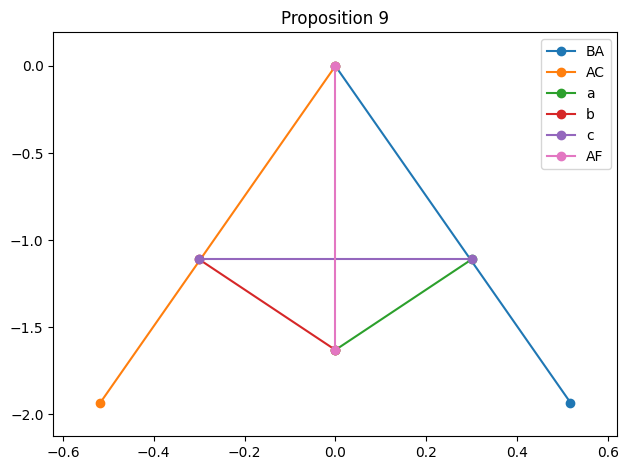

In [86]:
plot_2d([BAC.a, BAC.b, DEF, AF], names=['BA', 'AC', 'DEF', 'AF'], annotate=False, title='Proposition 9')

In [89]:
def half_angle_prop9(a: Line2E, b: Line2E):
  """
  Given two intersecting lines, cuts angle between them in half using propsition 9
  """
  D = b.random_point(seed=10)
  C = get_common_point(a, b)
  if C is None:
    raise ValueError("Lines given do not have points in common")
  CD = Line2E(C, D)
  CE = prop_3(CD, a)
  E = CE.p2
  DE = Line2E(D, E)
  DEF = draw_equilateral(DE, direction=-1)
  AF = Line2E(C, DEF.C)
  return AF

# Proposition 10: To cut a given finite straight-line in half

In [90]:
#Let AB be the given finite straight-line.
AB = Line2E(Point2(0.0, 0.0), Point2(2.0, 0.0))
#Let the equilateral triangle ABC have been constructed upon AB
ABC = draw_equilateral(AB)
#Let the angle ACB be cut in half by the line CD (Prop 9)
CD = half_angle_prop9(ABC.a, ABC.b)

#Extend line and intersect for convenience
F = extend_line(CD.p1, CD.p2, ABC.a.__len__())
D = Line2E(ABC.C, F).intersect(AB)
line = Line2E(ABC.C, D)

#Claim: AB has been cut in half by point D
AD = Line2E(ABC.A, D)
DB = Line2E(D, ABC.B)
prop10_cond = AD.__len__() == DB.__len__() and angle_btw_lines(line, ABC.a) == angle_btw_lines(line, ABC.b)
if prop10_cond:
  print("AB has been cut in half by point D, the very thing it was required to do.")

AB has been cut in half by point D, the very thing it was required to do.


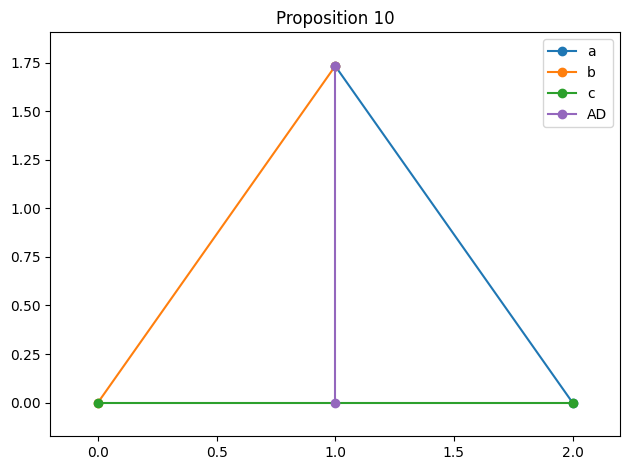

In [91]:
plot_2d([ABC, line], names=['ABC', 'AD'], annotate=False, title='Proposition 10')

In [92]:
def cut_line_in_half_prop_10(line: Line2E):
  """
  Uses algorithm developed in proposition 10 to cut a given line in half
  """
  ABC = draw_equilateral(line)
  CD = half_angle_prop9(ABC.a, ABC.b)

  F = extend_line(CD.p1, CD.p2, ABC.a.__len__())
  D = Line2E(ABC.C, F).intersect(line)
  line = Line2E(ABC.C, D)

  BD = Line2E(ABC.A, D)
  DA = Line2E(D, ABC.B)
  return BD, DA

# Proposition 11: To draw a straight-line at right-angles to a given straight-line from a given point on it.

In [93]:
#Let AB be straight line
A = Point2(0.0, 0.0)
B = Point2(2.0, 0.0)
AB = Line2E(A, B)
#C given point on the line
C = Point2(1.0, 0.0)
#Pick D at random on AC
AC = Line2E(A, C)
CB = Line2E(C, B)
D = AC.random_point(seed=25)
CD = Line2E(C, D)
#Let CE be equal to CD
CE = prop_3(CB, CD)
DE = Line2E(D, CE.p2)
#Extract E
FDE = draw_equilateral(DE)
#take point F, draw down to C
F = FDE.C
FC = Line2E(F, C)
#Required to draw straight-line from the point C at right angle
prop11_cond = angle_btw_lines(FC, CE) == angle_btw_lines(FC, CD) == 90.0
if prop11_cond:
  print("The line CF has been drawn at a right angle to AB, the very thing it was required to do.")

The line CF has been drawn at a right angle to AB, the very thing it was required to do.


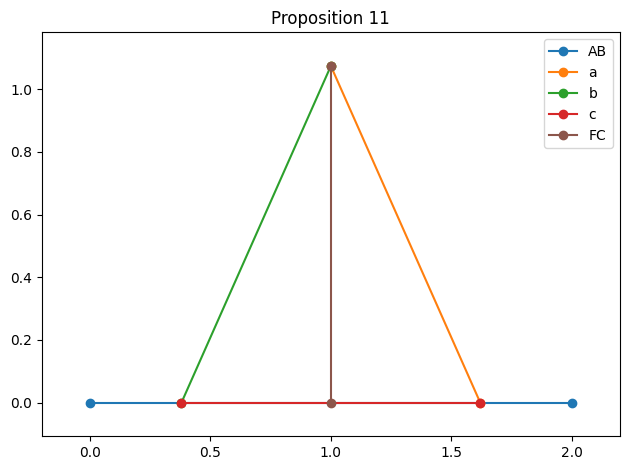

In [94]:
plot_2d([AB, FDE, FC], names=['AB', 'FDE', 'FC'], annotate=False, title='Proposition 11')

In [95]:
def draw_perpendicular_prop11(AB: Line2E):
  """
  Draw perpendicular line to AB, as done in prop 11
  """
  A = AB.p1
  B = AB.p2
  AB_2, _ = cut_line_in_half_prop_10(AB) # find midpoint using prop 10
  C = AB_2.p2
  #Pick D at random on AC
  AC = Line2E(A, C)
  CB = Line2E(C, B)
  D = AC.random_point()
  CD = Line2E(C, D)
  #Let CE be equal to CD
  CE = prop_3(CB, CD)
  DE = Line2E(D, CE.p2)
  #Extract E
  FDE = draw_equilateral(DE)
  #take point F, draw down to C
  F = FDE.C
  FC = Line2E(F, C)
  return FC


# Proposition 12: To draw a straight-line perpendicular to a given infite straight-line from a given point which is not on it.

In [96]:
#Let AB be the given infinite straight line
A = Point2(0.0, 0.0)
B = Point2(6.0, 0.0)
AB = Line2E(A, B)
#Let C be the given point not on AB
C = Point2(3.0, 1.0)
#Let the point D be taken at random on the other side of AB
#Assigning for convenience
D = Point2(2.3, -1.0)
#Let the circle EFG have been drawn with center C and radius CD
EFG = Circle2E(C, C.distance(D))
#Let the straight-line EG have been cut in in half at (point) H
AH, HB = cut_line_in_half_prop_10(AB)
H = AH.p2
#Intersections
G = EFG.intersect(AB).p1
E = EFG.intersect(AB).p2
#Let the lines CG, CH, CE have been joined
CG = Line2E(C, G)
CH = Line2E(C, H)
CE = Line2E(C, E)
#CH Has been drawn perpendicular to the line AB
prop12_cond = angle_btw_lines(CH, AB) == 90.0
if prop12_cond:
  print("The line CH has been drawn at a right angle/perpendicular to AB, the very thing it was required to do.")

The line CH has been drawn at a right angle/perpendicular to AB, the very thing it was required to do.


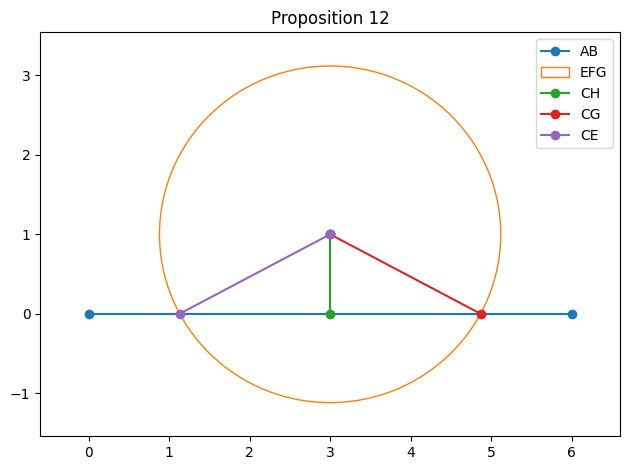

In [97]:
plot_2d([AB, EFG, CH, CG, CE], names=['AB', 'EFG', 'CH', 'CG', 'CE'], annotate=False, title='Proposition 12')

# Proposition 13: If a straight-line stood on another straight-line makes angles, it will certainly either make two right angles or angle whose sum is equal to two right angles. 

In [98]:
#Let some straight line AB stood on the straight-line CD make the angles CBA and ABD
A = Point2(0.5, 0.5)
B = Point2(0.0, 0.0)
AB = Line2E(A, B)
C = Point2(1.0, 0.0)
D = Point2(-1.0, 0.0)
DC = Line2E(D, C)
CBA = angle_btw_lines(Line2E(B, C), AB)
ABD = angle_btw_lines(Line2E(D, B), AB)
#By prop 10, if angles are equal then they are right angles, if not
#Let BE be drawn perpendicular by prop 11
BE = draw_perpendicular_prop11(DC)
EBD = angle_btw_lines(Line2E(D, B), BE)
ABE = angle_btw_lines(AB, BE)
prop13_cond = (CBA + ABD) == 180.0 and (EBD + ABE + CBA) == 180.0
if prop13_cond:
  print("""
  The straight line AB stood on another line DC will either make two right angles or angles that sum to two right angles, 
  the very thing it was required to do.
  """)


  The straight line AB stood on another line DC will either make two right angles or angles that sum to two right angles, 
  the very thing it was required to do.
  


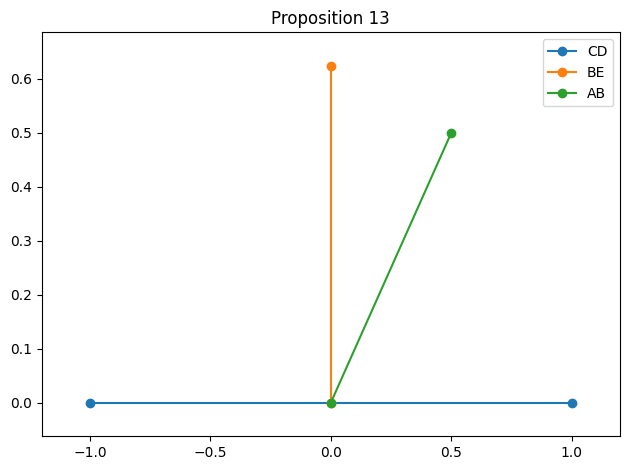

In [99]:
plot_2d([DC, BE, AB], names=['CD', 'BE', 'AB'], annotate=False, title='Proposition 13')

# Proposition 14: If two straight-lines, not lying on the same side, make adjacent angles, whose sum is equal to two right angles with some straight-line, at a point on it, then the two straight-lines will be straight-on with respect to one another.

In [100]:
#Create BC and BD
B = Point2(0.5, 0.0)
C = Point2(0.0, 0.0)
D = Point2(1.0, 0.0)
CB = Line2E(C, B)
BD = Line2E(B, D)
#Create AB
A = Point2(0.0, 0.5)
AB = Line2E(A, B)
#Create EB
E = Point2(1.0, 0.5)
EB = Line2E(E, B)
#Create Angles
CBA = angle_btw_lines(CB, AB)
ABE = angle_btw_lines(AB, BE)
EBD = angle_btw_lines(EB, BD)
ABD = angle_btw_lines(AB, BD)
#Assume AB stands on the 'straight line' CBE
#We have by prop 13
CBE_angle = CBA + ABE
#CBE_angle must be 180
CBD_angle = CBA + ABD
#But CBD must also be 180
#Subtract CBA to have ABE = ABD
prop14_cond = ABE != ABD
if prop14_cond:
  print("Consistent of common notion 3, the lesser cannot equal the greater. CB is straight with and only straight with BD.")

Consistent of common notion 3, the lesser cannot equal the greater. CB is straight with and only straight with BD.


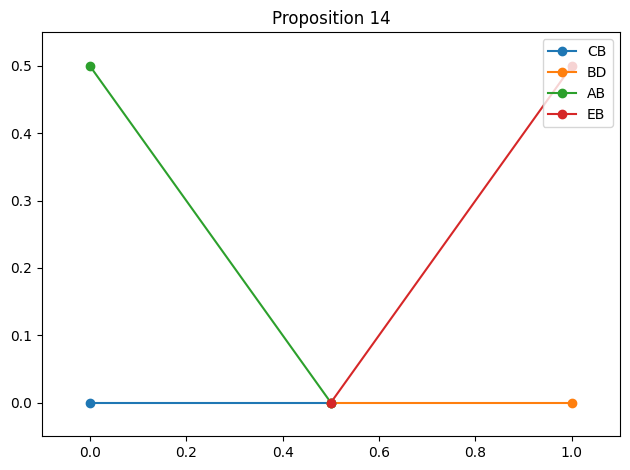

In [101]:
plot_2d([CB, BD, AB, EB], names=['CB', 'BD', 'AB', 'EB'], annotate=False, title='Proposition 14')

# Proposition 15: If two straight-lines cut one another then they make the vertically opposite angles equal to one another. 

In [102]:
#Let two straight-lines AB and CD cut one another at point E
A = Point2(0.0, 1.0)
B = Point2(1.0, -1.0)
AB = Line2E(A, B)
C = Point2(0.0, 0.0)
D = Point2(1.0, 0.0)
CD = Line2E(C, D)
E = AB.intersect(CD)
#
CEA = angle_btw_lines(Line2E(C, E), Line2E(A, E))
AED = angle_btw_lines(Line2E(D, E), Line2E(A, E))
DEB = angle_btw_lines(Line2E(D, E), Line2E(B, E))
#ED intersects AB and must have both angles sum to two right angles
print("DEB + AED = 180.0", CEA + AED == 180.0)
#But CEA and AED must also sum to two right angles
print("CEA + AED = 180.0", CEA + AED == 180.0)
#Subtract AED from both equations
prop15_cond = (CEA+AED - AED) == (DEB+AED - AED)
if prop15_cond:
  print("The vertically opposite angles CEA and DEB are equal, the very thing it was required to do.")

DEB + AED = 180.0 True
CEA + AED = 180.0 True
The vertically opposite angles CEA and DEB are equal, the very thing it was required to do.


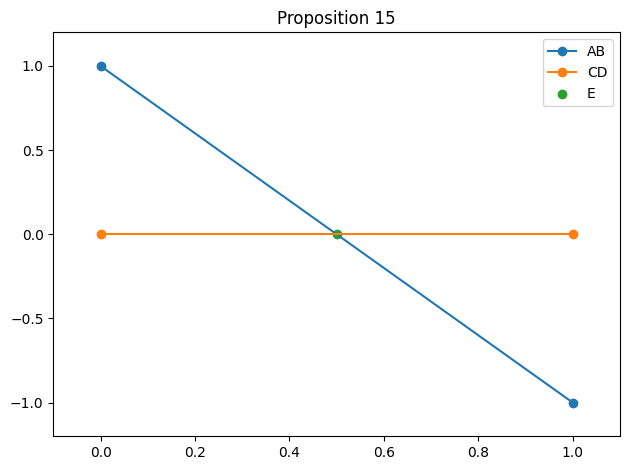

In [103]:
plot_2d([AB, CD, E], names=['AB', 'CD', 'E'], annotate=False, title='Proposition 15')

# Proposition 16: For any triangle, when one of the sides is produced, the the external angle is greater than each of the internal and opposite angles.

This proposition states that when one side of the triangle is extended, the external angle is greater than each of the non-adjacent angles. So in this example, angle alpha and gamma should each be less than the external angle.

In [104]:
#Let ABC be a triangle, let one of its sides BC extend to D
B = Point2(0.0, 0.0)
C = Point2(1.0, 0.0)
BC = Line2E(B, C)
ABC = draw_equilateral(BC)
D = Point2(2.0, 0.0)
BD = Line2E(ABC.B, D)
#Let the line AC be cut in half at the point E by prop 10
AE, EC = cut_line_in_half_prop_10(ABC.a)
E = AE.p2
#And BE being joined, let it be extended to point F
BE = Line2E(B, E)
F = extend_line(B, E, 2.0)
#Let EF be made equal to BE (prop 3)
EF_long = Line2E(E, F)
EF = prop_3(EF_long, BE)
#Let FC have been joined
FC = Line2E(F, C)
#Let AC have been drawn through point G
G = extend_line(ABC.C, C, 0.5)
CG = Line2E(ABC.B, G) 
ACD = angle_btw_lines(ABC.a, Line2E(C,D))
prop16_cond = ABC.gamma < ACD and ABC.alpha < ACD
if prop16_cond:
  print("When one side extended, the external angle is greater than each of the non-adjacent angles, the very thing it was required to do.")

When one side extended, the external angle is greater than each of the non-adjacent angles, the very thing it was required to do.


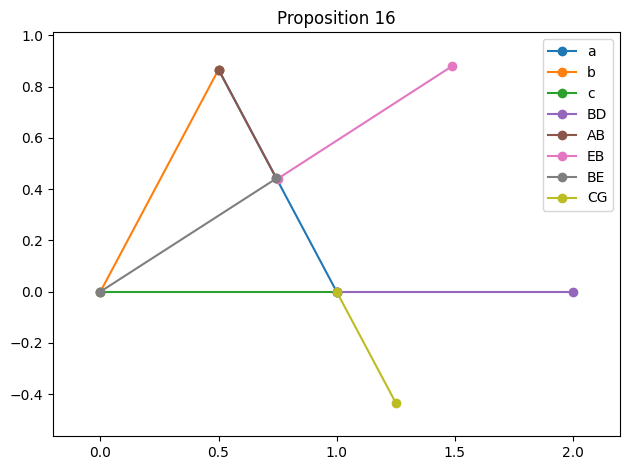

In [105]:
plot_2d([ABC, BD, AE, EF, BE, CG], names=['ABC', 'BD', 'AB', 'EB', 'BE', 'CG'], annotate=False, title='Proposition 16')

# Proposition 17: For any triangle, the sum of two angles taken together in any possible way is less than two right-angles.

This proposition should be a consequence of the methods of constructing triangles, not an algorithm for simplifying a process going forward. The proof here is just a unit test of Triangle construction.

In [106]:
#Let ABC be a triangle
ABC = Triangle.SSS(3, 4, 5)
gb = ABC.gamma + ABC.beta < 180.0
ga = ABC.gamma + ABC.alpha < 180.0
ba = ABC.beta + ABC.alpha < 180.0
prop17_cond = gb and ga and ba
if prop17_cond:
  print("All angles summed in every possible way are less than two right angles, the very thing it was required to do.")

All angles summed in every possible way are less than two right angles, the very thing it was required to do.


# Proposition 18: In any triangle, the greater side subtends the greater angle. 

This proposition is saying that given that one side is greater than the other, the corresponding angles must also hold the same inequality. 

In [107]:
ABC = Triangle.SSS(3, 4, 5)
#ENSURE c has the greatest length
c_len = ABC.c.__len__() > ABC.b.__len__() and ABC.c.__len__() > ABC.a.__len__()
#ENSURE ANGLE OF c (gamma) has greatest magnitude
angle_cond = ABC.gamma > ABC.alpha and ABC.gamma > ABC.beta
prop18_cond = c_len and angle_cond
if prop18_cond:
  print("The sides and angles hold the same inequalities, The very thing it was required to do.")

The sides and angles hold the same inequalities, The very thing it was required to do.


# Proposition 19: In any triangle, the greater angle is subtended by the greater side. 

This proposition is saying that given that one angle is greater than another, the corresponding sides must also hold the same inequality.

In [108]:
#Let ABC be a triangle with angle ABC creater than BCA (beta greater than gamma)
ABC = Triangle.AAA(30.0, 80.0, 70.0)
BCA = Triangle.AAA(50.0, 60.0, 70.0)
prop19_cond = ABC.c.__len__() < ABC.b.__len__() and BCA.c.__len__() < ABC.b.__len__()
if prop19_cond:
  print("In the given triangles the greater angle is subtended by the greater side, The very thing it was required to do.")

In the given triangles the greater angle is subtended by the greater side, The very thing it was required to do.


# Proposition 20: In any triangle, the sum of two sides taken together in any possible way is greater than the remaining side.

In [109]:
ABC = Triangle.SSS(3, 4, 5)
cb = ABC.c.__len__() + ABC.b.__len__() > ABC.a.__len__()
ca = ABC.c.__len__() + ABC.a.__len__() > ABC.b.__len__()
ab = ABC.a.__len__() + ABC.b.__len__() > ABC.c.__len__()
prop20_cond = cb and ca and ab
if prop20_cond:
  print("The sum of any two sides is greater than the remaining side, The very thing it was required to do.")

The sum of any two sides is greater than the remaining side, The very thing it was required to do.


# Check All Propositions

In [110]:
#Include all prop booleans for check of entire notebook
prop1_to_20_pass = prop1_cond and prop2_cond and prop3_cond and prop4_cond and prop5_cond and prop6_cond and prop7_cond and prop8_cond and prop9_cond and prop10_cond and prop11_cond and prop12_cond and prop13_cond and prop14_cond and prop15_cond and prop16_cond and prop17_cond and prop18_cond and prop19_cond and prop20_cond

In [111]:
if prop1_to_20_pass:
  print("All propositions have shown what was required.")

All propositions have shown what was required.


# Sources

[1] Fitzpatrick, R. (2007). Euclid's Elements of Geometry: In English with an Introduction, and Notes. Springer Science & Business Media.

[2] Holkner, A. (2010). Euclid: A Python geometry library [Source code]. GitHub. https://github.com/aholkner/euclid